# Using the deafrica-waterbodies command line tool

In [1]:
# Uncomment the line below to install deafrica-waterbodies
#!python -m pip install ../.

## Load the necessary python packages

In [2]:
import os
import math
import subprocess
import geopandas as gpd

## Analysis Parameters

For each of the specified parameters below, see the [Turn water observations into waterbody polygons notebook](TurnWaterObservationsIntoWaterbodyPolygons.ipynb) for more details.

If you wish to filter out major rivers and CBD areas from your waterbodies, please add the flags, 
`--remove-major-rivers` and `--remove-cbd` respectively and set the paths to the vector datasets you would like to use for filtering using `--major-rivers-mask-fp='<path to dataset>` and `--urban-mask-fp=<path to dataset>`.

In [3]:
# File path to the vector file defining our area of interest. 
vector_file_fp = "/home/jovyan/Data/Waterbodies/InputDatasets/SenegalBasin.geojson"
primary_threshold = 0.1
secondary_threshold = 0.05
min_polygon_size = 4500
max_polygon_size = math.inf
land_sea_mask_fp = "/home/jovyan/Data/Waterbodies/InputDatasets/goas_v01.gpkg"
#major_rivers_mask_fp
#urban_mask_fp
handle_large_polygons="erode-dilate-v2"
pp_test_threshold=0.005
ouptut_folder="/home/jovyan/Data/Waterbodies/OutputDatasets"
output_base_filename="SenegalBasinWaterbodies"
output_file_type="GeoJSON"

In [4]:
#The script deafrica-waterbodies is installed in '/home/jovyan/.local/bin' which is not on PATH.
executable = "/home/jovyan/.local/bin/deafrica-waterbodies"
cmd = f"{executable} waterbodies-from-vector-file --vector-file-fp={vector_file_fp} -v " \
f"--primary-threshold={primary_threshold} --secondary-threshold={secondary_threshold} " \
f"--min-polygon-size={min_polygon_size} --max-polygon-size={max_polygon_size} " \
f"--remove-ocean-polygons --land-sea-mask-fp={land_sea_mask_fp} --handle-large-polygons={handle_large_polygons} " \
f"--pp-test-threshold={pp_test_threshold} --ouptut-folder={ouptut_folder} --output-base-filename={output_base_filename} " \
f"--output-file-type={output_file_type}" 

run_cmd = cmd.split(" ")
run_cmd

['/home/jovyan/.local/bin/deafrica-waterbodies',
 'waterbodies-from-vector-file',
 '--vector-file-fp=/home/jovyan/Data/Waterbodies/InputDatasets/SenegalBasin.geojson',
 '-v',
 '--primary-threshold=0.1',
 '--secondary-threshold=0.05',
 '--min-polygon-size=4500',
 '--max-polygon-size=inf',
 '--remove-ocean-polygons',
 '--land-sea-mask-fp=/home/jovyan/Data/Waterbodies/InputDatasets/goas_v01.gpkg',
 '--handle-large-polygons=erode-dilate-v2',
 '--pp-test-threshold=0.005',
 '--ouptut-folder=/home/jovyan/Data/Waterbodies/OutputDatasets',
 '--output-base-filename=SenegalBasinWaterbodies',
 '--output-file-type=GeoJSON']

In [5]:
subprocess.run(run_cmd)

[2023-08-23 14:16:27,927] {make_polygons.py:186} INFO - Running for the WOfS All Time Summary tiles covering the defined area of interest...
[2023-08-23 14:16:27,927] {make_polygons.py:189} INFO - Setting up output directory
[2023-08-23 14:16:27,927] {helpers.py:214} INFO - Output folder /home/jovyan/Data/Waterbodies/OutputDatasets/waterbodies_outputs created.
[2023-08-23 14:16:27,928] {make_polygons.py:195} INFO - Loading tiles..
[2023-08-23 14:16:29,119] {make_polygons.py:199} INFO - Generating the first temporary set of waterbody polygons.
[2023-08-23 14:16:29,119] {make_polygons.py:67} INFO - We will be running a hybrid wetness threshold. 
**You have set 0.1 as the primary threshold, which will define the location of the waterbody polygons 
 with 0.05 set as the supplementary threshold, which will define the extent/shape of the waterbody polygons.**
[2023-08-23 14:16:29,407] {make_polygons.py:86} INFO - Generating polygons for tile: x164y097
[2023-08-23 14:16:33,920] {make_polygons

CompletedProcess(args=['/home/jovyan/.local/bin/deafrica-waterbodies', 'waterbodies-from-vector-file', '--vector-file-fp=/home/jovyan/Data/Waterbodies/InputDatasets/SenegalBasin.geojson', '-v', '--primary-threshold=0.1', '--secondary-threshold=0.05', '--min-polygon-size=4500', '--max-polygon-size=inf', '--remove-ocean-polygons', '--land-sea-mask-fp=/home/jovyan/Data/Waterbodies/InputDatasets/goas_v01.gpkg', '--handle-large-polygons=erode-dilate-v2', '--pp-test-threshold=0.005', '--ouptut-folder=/home/jovyan/Data/Waterbodies/OutputDatasets', '--output-base-filename=SenegalBasinWaterbodies', '--output-file-type=GeoJSON'], returncode=0)

In [6]:
# Read the output file.
output_fp = "/home/jovyan/Data/Waterbodies/OutputDatasets/waterbodies_outputs/SenegalBasinWaterbodies.geojson"
waterbodies =  gpd.read_file(output_fp)

<Axes: >

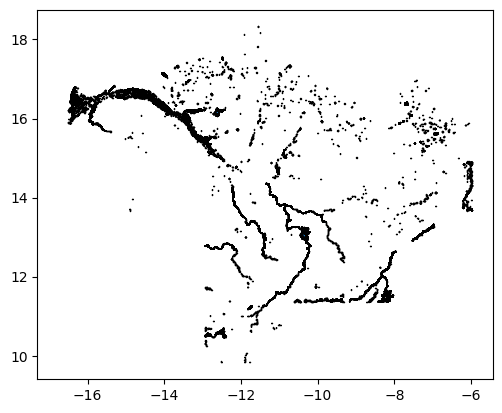

In [7]:
# Plot the waterbodies. 
waterbodies.plot(edgecolor='k')